In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pickle

#graph hangul fonts
from matplotlib import font_manager, rc

In [2]:
with open("heatmap_matrix.pkl", "rb") as f:
    mat = pickle.load(f)
data = pd.read_csv("dataset.csv")

In [3]:
platform = ['YouTube', 'Spotify', 'Netflix Film', 'Netflix TV'] # 'YouTube Music', 'Spotify Weekly'
country_code = ["US", "CA", "GB", "DE", "FR", "BR", "MX", "IN", "JP", "KR"]

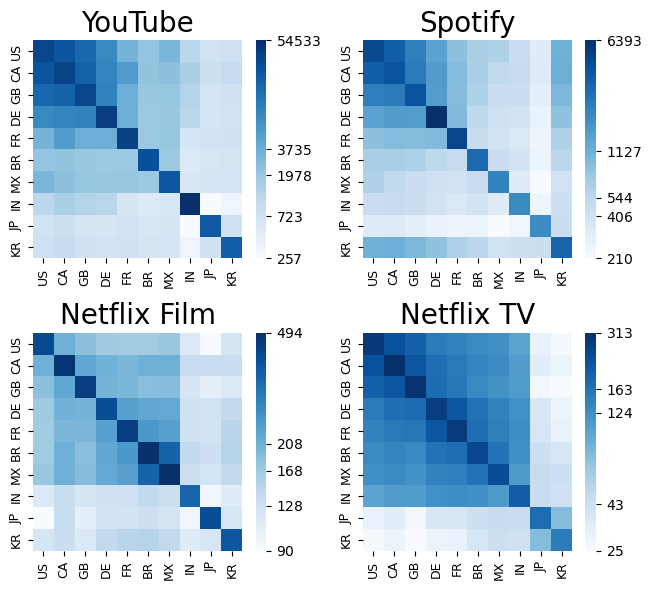

In [4]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as tkr


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6.66, 6))
for i in range(2):
    for j in range(2):
        idx = i*2 + j
        platform_name = platform[idx]
        tick = data[platform_name]
        ticks = [round(t) for t in [tick.min(), tick.quantile(0.25), tick.quantile(0.50), 
                 tick.quantile(0.75), tick.max()]]
        formatter = tkr.ScalarFormatter(useMathText=True)
        formatter.set_scientific(False)
        heatmap_mat = mat[idx]
        sns.heatmap(heatmap_mat, cmap='Blues', annot=False, norm=LogNorm(), 
                    ax=axes[i, j], vmin=tick.min(), vmax=tick.max(), 
                    cbar_kws={"ticks": ticks, "format": formatter})
        cbar = axes[i, j].collections[0].colorbar
        cbar.ax.yaxis.set_ticks([], minor=True)
        #cbar.set_ticks(ticks)
        #cbar.ax.set_yticklabels(ticks, size=9)
        axes[i, j].set_title(platform_name, fontsize=20)
        axes[i, j].tick_params(axis='x', labelsize=9)
        axes[i, j].tick_params(axis='y', labelsize=9)
        axes[i, j].set_xlabel("")
        axes[i, j].set_ylabel("")

plt.tight_layout()
plt.savefig("./figure1_heapmap.png")
plt.show()

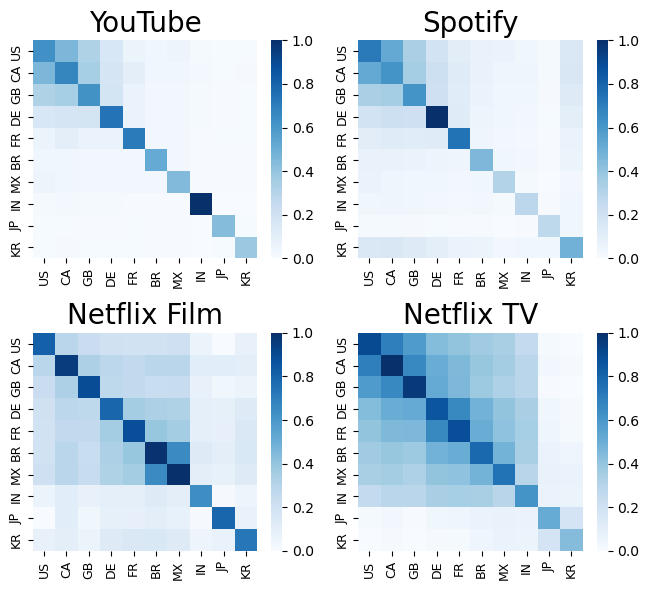

In [5]:
# Fig.2 - Heatmap

# TODO: make fontsize of color bars larger
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as tkr

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6.66, 6))
for i in range(2):
    for j in range(2):
        idx = i*2 + j
        platform_name = platform[idx]
        tick = data[platform_name]
        
        formatter = tkr.ScalarFormatter(useMathText=True)
        formatter.set_scientific(False)
        matrix = mat[idx]

        # 전체 데이터의 최소값과 최대값 계산
        data_min = matrix.values.min()
        data_max = matrix.values.max()

        # 최소-최대 스케일링 수행
        scaled_df = (matrix - data_min) / (data_max - data_min)
        ticks = [round(t) for t in [scaled_df.min(), scaled_df.quantile(0.25), 
                                    scaled_df.quantile(0.50), scaled_df.quantile(0.75), scaled_df.max()]]
        sns.heatmap(scaled_df, cmap='Blues', annot=False, 
                    ax=axes[i, j])
        cbar = axes[i, j].collections[0].colorbar
        cbar.ax.yaxis.set_ticks([], minor=True)
        #cbar.set_ticks(ticks)
        #cbar.ax.set_yticklabels(ticks, size=9)
        axes[i, j].set_title(platform_name, fontsize=20)
        axes[i, j].tick_params(axis='x', labelsize=9)
        axes[i, j].tick_params(axis='y', labelsize=9)
        axes[i, j].set_xlabel("")
        axes[i, j].set_ylabel("")

plt.tight_layout()
plt.savefig("./figure1_heapmap_scaled.png")
plt.show()

In [6]:
matrix = mat[idx]

# 전체 데이터의 최소값과 최대값 계산
data_min = matrix.values.min()
data_max = matrix.values.max()

# 최소-최대 스케일링 수행
scaled_df = (matrix - data_min) / (data_max - data_min)

In [7]:
scaled_df

fr_loc,US,CA,GB,DE,FR,BR,MX,IN,JP,KR
user_loc,,,,,,,,,,
US,0.899306,0.697917,0.583333,0.440972,0.402778,0.364583,0.340278,0.256944,0.017361,0.003472
CA,0.697917,1.000000,0.663194,0.506944,0.451389,0.392361,0.357639,0.288194,0.027778,0.013889
GB,0.583333,0.663194,0.961806,0.517361,0.454861,0.375000,0.326389,0.291667,0.006944,0.000000
DE,0.440972,0.506944,0.517361,0.857639,0.656250,0.482639,0.402778,0.336806,0.041667,0.013889
FR,0.402778,0.451389,0.454861,0.656250,0.885417,0.506944,0.413194,0.350694,0.045139,0.017361
BR,0.364583,0.392361,0.375000,0.482639,0.506944,0.781250,0.479167,0.340278,0.062500,0.045139
MX,0.340278,0.357639,0.326389,0.402778,0.413194,0.479167,0.743056,0.295139,0.072917,0.062500
IN,0.256944,0.288194,0.291667,0.336806,0.350694,0.340278,0.295139,0.614583,0.069444,0.059028
JP,0.017361,0.027778,0.006944,0.041667,0.045139,0.062500,0.072917,0.069444,0.513889,0.177083
